# Trousers and jeans model

0 - Male trousers
1 - Female trousers
2 - Male jeans
3 - Female jeans

This is a simple model - Conv2D -> Flatten - > Dense 

# Import relevant libraries

In [1]:
import io
import itertools
import numpy as np
import sklearn.metrics
import tensorflow as tf
from tensorboard.plugins.hparams import api as hp
import matplotlib.pyplot as plt
from keras import layers
import keras

# Load the data

Data train files: ['images', 'labels', 'genders']
Size of the images: (4004, 120, 90, 3)
Size of the labels: (4004,)
Unique values of the labels: [0 1 2 3]
The label of 129'th image is 0
The label of 1263'th image is 3


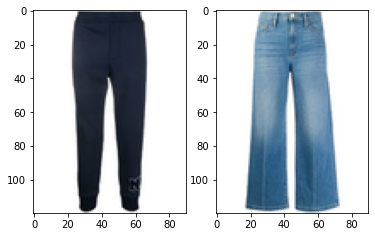

In [2]:
data_train = np.load(r"data/Trousers & Jeans - All - Train.npz")
data_validation = np.load(r"data/Trousers & Jeans - All - Validation.npz")
data_test = np.load(r"data/Trousers & Jeans - All - Test.npz")

print("Data train files: {}".format(data_train.files))
print("Size of the images: {}".format(data_train['images'].shape))
print("Size of the labels: {}".format(data_train['labels'].shape))
print("Unique values of the labels: {}".format(np.unique(data_train['labels'])))
n = np.random.randint(0, 4002)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(data_train['images'][n])
print("The label of {}'th image is {}".format(n, data_train['labels'][n]))

n = np.random.randint(0, 4002)
ax2.imshow(data_train['images'][n])
print("The label of {}'th image is {}".format(n, data_train['labels'][n]))

In [3]:
images_train = data_train['images']
labels_train = data_train['labels']

images_val = data_validation['images']
labels_val = data_validation['labels']

images_test = data_test['images']
labels_test = data_test['labels']

In [4]:
images_train = images_train/255.0
images_val = images_val/255.0
images_test = images_test/255.0 

# Training the models

In [5]:
EPOCHS = 30
BATCH_SIZE = 64 #power of 2


METRIC_ACCURACY = "accuracy"


## -------- Data augmentation layers ----------------------------

In [6]:
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
])

## --------------------------------------------------------------------------

## Model

In [7]:
model = keras.Sequential([
    # Data Augmentation layer
    data_augmentation,
    # Model layers
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(4)
])
    
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer="adam", loss=loss_fn, metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    mode = 'auto',
    min_delta = 0,
    patience = 2,
    verbose = 0, 
    restore_best_weights = True
)
    

model.fit(
    images_train,
    labels_train,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    callbacks = early_stopping,
    validation_data = (images_val,labels_val),
    verbose = 2
)
    
    

_, accuracy = model.evaluate(images_val,labels_val)


Epoch 1/30
63/63 - 42s - loss: 1.5147 - accuracy: 0.3511 - val_loss: 1.2600 - val_accuracy: 0.4200
Epoch 2/30
63/63 - 24s - loss: 1.1748 - accuracy: 0.4848 - val_loss: 1.2283 - val_accuracy: 0.4080
Epoch 3/30
63/63 - 24s - loss: 1.1102 - accuracy: 0.5275 - val_loss: 1.1575 - val_accuracy: 0.4660
Epoch 4/30
63/63 - 24s - loss: 1.0687 - accuracy: 0.5362 - val_loss: 1.1060 - val_accuracy: 0.5260
Epoch 5/30
63/63 - 24s - loss: 1.0361 - accuracy: 0.5562 - val_loss: 1.1673 - val_accuracy: 0.4820
Epoch 6/30
63/63 - 24s - loss: 0.9981 - accuracy: 0.5737 - val_loss: 1.1000 - val_accuracy: 0.5140
Epoch 7/30
63/63 - 25s - loss: 0.9755 - accuracy: 0.5779 - val_loss: 1.0986 - val_accuracy: 0.5140
Epoch 8/30
63/63 - 25s - loss: 0.9607 - accuracy: 0.5937 - val_loss: 0.9977 - val_accuracy: 0.5540
Epoch 9/30
63/63 - 24s - loss: 0.9293 - accuracy: 0.6006 - val_loss: 1.0036 - val_accuracy: 0.5460
Epoch 10/30
63/63 - 25s - loss: 0.9103 - accuracy: 0.6194 - val_loss: 1.0070 - val_accuracy: 0.5440
16/16 [==